In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb
import json

In [2]:
#Task 1
#Load data
df_movie=pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')
df_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
df_movie.shape #Fetching the rows and columns of the dataset

(4803, 20)

In [11]:
df = df_movie_new[['title','genres']].head(50) #Fetching the titles and genres of the top 50 movies
df.groupby("genres")["title"].count()

genres
Action             23
Adventure          14
Animation           4
Drama               2
Family              1
Fantasy             2
Science Fiction     3
Thriller            1
Name: title, dtype: int64

# TASK-2

In [4]:
df_movie.isnull().sum() #Fetching the null count

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
df_movie['homepage'].fillna('not available',inplace=True)
df_movie['overview'].fillna('not available',inplace=True)
df_movie['release_date'].fillna(method='ffill',inplace=True)#forward filling
df_movie['tagline'].fillna('not available',inplace=True)

In [8]:
run_mode=df_movie['runtime'].mode()[0]
run_mode

90.0

In [9]:
df_movie['runtime'].fillna(run_mode,inplace=True)

In [10]:
df_movie.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

# TASK-3

In [4]:
df_movie_new = df_movie.copy() #Taking a copy of the dataset
df_movie_new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
# Converting the data from json format
json_columns = ['genres','keywords','production_companies','production_countries','spoken_languages']
for col in json_columns:
    df_movie_new[col] = df_movie_new[col].apply(lambda x: [item ['name'] for item in json.loads(x)])

df_movie_new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10-12-2009,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19-05-2007,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26-10-2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16-07-2012,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],07-03-2012,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",NaN,9367,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],"[Mexico, United States of America]",04-09-1992,2040920,81.0,[Español],Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],13-10-2013,0,120.0,[English],Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[United States of America, China]",03-05-2012,0,98.0,[English],Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


In [6]:
# Updating the converted data to the copied dataset
for col in json_columns:
    df_movie_new[col]=df_movie_new[col].apply(lambda x:x[0] if isinstance (x,list) and x else None)
    
df_movie_new    

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,Action,NaN,9367,united states–mexico barrier,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,Mexico,04-09-1992,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,Comedy,NaN,72766,None,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,None,None,26-12-2011,0,85.0,None,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,Comedy,http://www.hallmarkchannel.com/signedsealeddel...,231617,date,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures,United States of America,13-10-2013,0,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,None,http://shanghaicalling.com/,126186,None,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,None,United States of America,03-05-2012,0,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


In [15]:
#Fetching genres with budget greater than $220,000.
df_movie_new['genres'][df_movie_new['budget'] > 220000].unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Music',
       'Documentary', 'TV Movie', None, 'Foreign'], dtype=object)

# TASK-4

In [16]:
#Fetching genres of movies which has generated revenue more than $961,000,000.
df_movie_new['genres'][df_movie_new['revenue'] > 961000000].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Drama', 'Family',
       'Animation'], dtype=object)

# Task-5

In [20]:
df_movie_new[df_movie_new['budget']==0] # Fetching the movies where budget is 0.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
265,0,Comedy,not available,10588,cat,en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,Imagine Entertainment,United States of America,21-11-2003,0,82.0,English,Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
321,0,Comedy,not available,77953,politics,en,The Campaign,Two rival politicians compete to win an electi...,16.460356,Everyman Pictures,United States of America,09-08-2012,104907746,85.0,English,Released,May The Best Loser Win.,The Campaign,5.6,578
359,0,Adventure,http://www.foxmovies.com/movies/alvin-and-the-...,258509,chipmunk,en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,Regency Enterprises,United States of America,17-12-2015,233755553,92.0,English,Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428
406,0,Drama,http://www.arthurchristmas.com/,51052,holiday,en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,Columbia Pictures,United States of America,22-02-2011,0,97.0,English,Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.7,333
409,0,Drama,not available,16858,show business,en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,Twentieth Century Fox Film Corporation,United States of America,20-12-1979,37823676,123.0,English,Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,Drama,not available,124606,gang,en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,Asylum Films,United States of America,09-09-1995,0,98.0,English,Released,Sometimes you've got to break the rules,Bang,6.0,1
4797,0,Foreign,not available,67238,None,en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,None,None,12-03-2005,0,80.0,None,Released,not available,Cavite,7.5,2
4800,0,Comedy,http://www.hallmarkchannel.com/signedsealeddel...,231617,date,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures,United States of America,13-10-2013,0,120.0,English,Released,not available,"Signed, Sealed, Delivered",7.0,6
4801,0,None,http://shanghaicalling.com/,126186,None,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,None,United States of America,03-05-2012,0,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


In [21]:
#Deleting rows with budget zero
df_movie_new = df_movie_new.drop(df_movie[df_movie.budget == 0].index)
df_movie_new


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,Park Films,Ireland,01-01-2007,0,84.0,English,Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,Crime,not available,36095,japan,ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,Japan,06-11-1997,99000,111.0,日本語,Released,Madness. Terror. Murder.,Cure,7.4,63
4796,7000,Science Fiction,http://www.primermovie.com,14337,distrust,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,English,Released,What happens if it actually works?,Primer,6.9,658
4798,220000,Action,not available,9367,united states–mexico barrier,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,Mexico,04-09-1992,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238


In [22]:
df_movie_new[df_movie_new['revenue']==0] # Fetching the movies where revenue is 0.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,Action,not available,79698,None,en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,Corsan,Australia,13-02-2015,0,109.0,English,Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,Drama,http://www.thewolfmanmovie.com/,7978,father son relationship,en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,Universal Pictures,United States of America,11-02-2010,0,102.0,English,Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
309,84000000,Fantasy,not available,10214,baby,en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,New Line Cinema,Germany,18-02-2005,0,94.0,English,Released,Who's next?,Son of the Mask,3.6,338
376,90000000,Science Fiction,not available,10357,subway,en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,Twentieth Century Fox Film Corporation,United States of America,25-04-1997,0,104.0,Deutsch,Released,The coast is toast,Volcano,5.2,376
433,84000000,Action,http://red-themovie.com/,146216,paris,en,RED 2,Retired C.I.A. agent Frank Moses reunites his ...,44.343330,DC Comics,Canada,18-07-2013,0,116.0,English,Released,The best never rest.,RED 2,6.4,1526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,500000,Drama,not available,40769,musician,en,Mutual Appreciation,Alan is a musician who leaves a busted-up band...,0.123068,None,None,01-03-2005,0,109.0,English,Released,not available,Mutual Appreciation,6.1,8
4774,27000,Drama,not available,42497,dream,en,Pink Narcissus,An erotic poem set in the fantasies of a young...,0.027811,Strand Releasing,United States of America,01-01-1971,0,64.0,English,Released,A unique experience in visual fantasy!,Pink Narcissus,6.0,9
4781,22000,Comedy,https://www.facebook.com/DrySpellMovie,255266,dating,en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,None,United States of America,14-02-2013,0,90.0,English,Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1
4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,Park Films,Ireland,01-01-2007,0,84.0,English,Released,Everything You've Heard is True,Tin Can Man,2.0,1


In [23]:
#Delete rows with revenue 0
df_movie_new = df_movie_new.drop(df_movie_new[df_movie_new.revenue == 0].index) 
df_movie_new

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,salesclerk,en,Clerks,Convenience and video store clerks Dante and R...,19.748658,Miramax Films,United States of America,13-09-1994,3151130,92.0,English,Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,Horror,not available,692,gay,en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,Dreamland Productions,United States of America,12-03-1972,6000000,93.0,English,Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,Crime,not available,36095,japan,ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,Japan,06-11-1997,99000,111.0,日本語,Released,Madness. Terror. Murder.,Cure,7.4,63
4796,7000,Science Fiction,http://www.primermovie.com,14337,distrust,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,English,Released,What happens if it actually works?,Primer,6.9,658


# Task-6

In [24]:
#Fetching top 10 movies with highest revenues.
top10 = df_movie_new.sort_values(by='revenue',ascending=False).head(10) 
#Displaying revenue ,title of movies with highest revenue in descending order
top10[['revenue','title']]

,revenue,title
0,2787965087,Avatar
25,1845034188,Titanic
16,1519557910,The Avengers
28,1513528810,Jurassic World
44,1506249360,Furious 7
7,1405403694,Avengers: Age of Ultron
124,1274219009,Frozen
31,1215439994,Iron Man 3
546,1156730962,Minions
26,1153304495,Captain America: Civil War


In [25]:
#Fetching top 10 movies with highest revenues.
top10b = df_movie_new.sort_values(by='budget',ascending=True).head(10) 
#Displaying budget,title of movies with least budget in ascending order
top10b[['budget','title']]  

,budget,title
4238,1,Modern Times
3611,4,A Farewell to Arms
3372,7,Split Second
3419,7,Bran Nue Dae
4608,8,The Prophecy
3131,10,Of Horses and Men
3137,10,Nurse 3-D
2933,11,F.I.S.T.
1912,25,Angela's Ashes
1771,28,The 51st State


# Task-7

In [57]:
#Separating numerical columns
numerical = df_movie_new.select_dtypes(exclude=object).columns
#Finding the correlation
corr_df=df_movie_new[numerical].corr()
corr_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269967,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.154243,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225661,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251208,0.197150,0.781487
runtime,0.269967,-0.154243,0.225661,0.251208,1.000000,0.374581,0.272068
vote_average,0.093146,-0.270595,0.273952,0.197150,0.374581,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.272068,0.312997,1.000000


<Axes: >

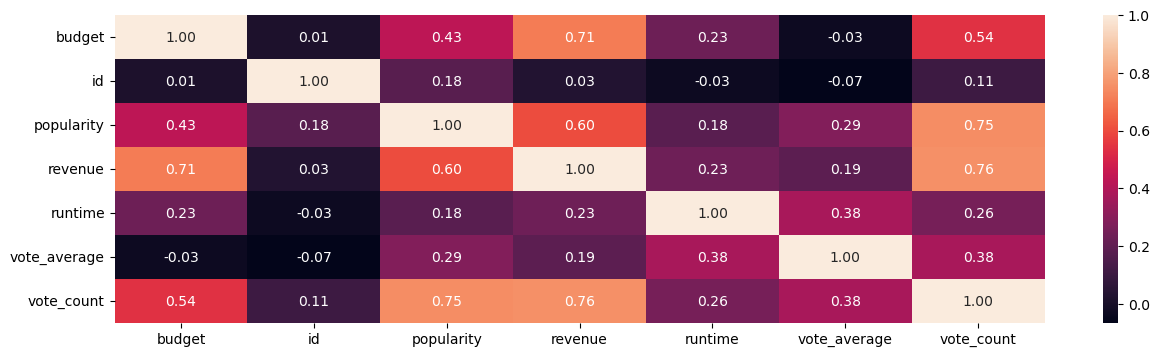

In [50]:
plt.figure(figsize=(15,4))
sb.heatmap(corr_df,annot=True,fmt='.2f')

In [51]:
#POPULARITY OF MOVIES IS POSITIVELY CORRELATED TO BUDGET BY 43% .
#INCREASE IN BUDGET LEADS TO INCREASE IN POPULARITY TO A CERTAIN EXTENT.

# TASK-8

In [18]:
df_movie_new
ProductionCompanies = df_movie_new['production_companies']
ProductionCompanies

0        Ingenious Film Partners
1           Walt Disney Pictures
2              Columbia Pictures
3             Legendary Pictures
4           Walt Disney Pictures
                  ...           
4798           Columbia Pictures
4799                        None
4800       Front Street Pictures
4801                        None
4802    rusty bear entertainment
Name: production_companies, Length: 4803, dtype: object

In [20]:
# Counting each name in the list
prod_name = []
prod_count = []
for i in ProductionCompanies:
    if i in prod_name:
        prod_count[prod_name.index(i)] += 1
    else:
        prod_name.append(i)
        prod_count.append(1)

df_prod = pd.DataFrame(prod_count, index=prod_name, columns=['Total'])
df_prod.sort_values(by='Total',ascending=False) 

,Total
None,351
Paramount Pictures,281
Universal Pictures,260
Columbia Pictures,200
Twentieth Century Fox Film Corporation,177
...,...
Australian Film Finance Corporation (AFFC),1
Stanley Kubrick Productions,1
Palpable Productions,1
Nelson Entertainment,1


# Task 9 

In [48]:
top20_prod = df_prod.sort_values(by=['Total'], ascending=False).head(25)
top20_prod

,Total
Paramount Pictures,241
Universal Pictures,228
Columbia Pictures,166
Twentieth Century Fox Film Corporation,159
New Line Cinema,135
Walt Disney Pictures,96
Village Roadshow Pictures,64
Miramax Films,61
United Artists,61
Columbia Pictures Corporation,58


# Task-10

In [23]:
#Finding the top 500 highest revenue movies 
df_desc=df_movie_new.sort_values(by = 'revenue' , ascending=False).head(500) 
df_desc

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,Drama,http://www.titanicmovie.com,597,shipwreck,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,Paramount Pictures,United States of America,18-11-1997,1845034188,194.0,English,Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,Science Fiction,http://marvel.com/avengers_movie/,24428,new york,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,Paramount Pictures,United States of America,25-04-2012,1519557910,143.0,English,Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,Action,http://www.jurassicworld.com/,135397,monster,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,Universal Studios,United States of America,09-06-2015,1513528810,124.0,English,Released,The park is open.,Jurassic World,6.5,8662
44,190000000,Action,http://www.furious7.com/,168259,car race,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,Universal Pictures,Japan,01-04-2015,1506249360,137.0,English,Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,48000000,Comedy,NaN,4256,horror spoof,en,Scary Movie 3,In the third installment of the Scary Movie fr...,36.585509,Dimension Films,United States of America,24-10-2003,220673217,84.0,English,Released,Great trilogies come in threes.,Scary Movie 3,5.8,912
41,200000000,Adventure,http://greenlanternmovie.warnerbros.com/,44912,dc comics,en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,De Line Pictures,United States of America,16-06-2011,219851172,114.0,English,Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487
521,60000000,Comedy,http://www.theterminal-themovie.com/,594,new york,en,The Terminal,Viktor Navorski is a man without a country; hi...,57.753914,DreamWorks SKG,United States of America,17-06-2004,219417255,128.0,български език,Released,Life is waiting.,The Terminal,7.0,1910
397,85000000,Comedy,http://itscomplicatedmovie.com/,22897,graduation,en,It's Complicated,"Ten years after their divorce, Jane and Jake A...",16.479851,Universal Pictures,United States of America,23-12-2009,219103655,121.0,English,Released,First comes marriage. Then comes divorce. And ...,It's Complicated,6.2,360


In [50]:
print('Mean of budget:' , df_desc['budget'].mean())
print('Median of budget:' ,df_desc['budget'].median())
print('Mode of budget:',df_desc['budget'].mode())

Mean of budget: 103193736.0


In [51]:
print('Mean of revenue:',df_desc['revenue'].mean())
print('Median of revenue:',df_desc['revenue'].median())
print('Mode of revenue:' , df_desc['revenue'].mode())

Median of budget: 95000000.0


In [52]:
print('Mean of runtime:',df_desc['runtime'].mean())
print('Median of runtime:',df_desc['runtime'].median())
print('Mode of runtime:' , df_desc['runtime'].mode())

Mode of budget: 0    150000000
Name: budget, dtype: int64


Mean of revenue: 458577595.062
Median of revenue: 363001569.5
Mode of revenue: 0       217764291
1       218340595
2       218613188
3       219076518
4       219103655
          ...    
495    1506249360
496    1513528810
497    1519557910
498    1845034188
499    2787965087
Name: revenue, Length: 500, dtype: int64


Mean of runtime: 118.626
Median of runtime: 116.0
Mode of runtime: 0    115.0
Name: runtime, dtype: float64


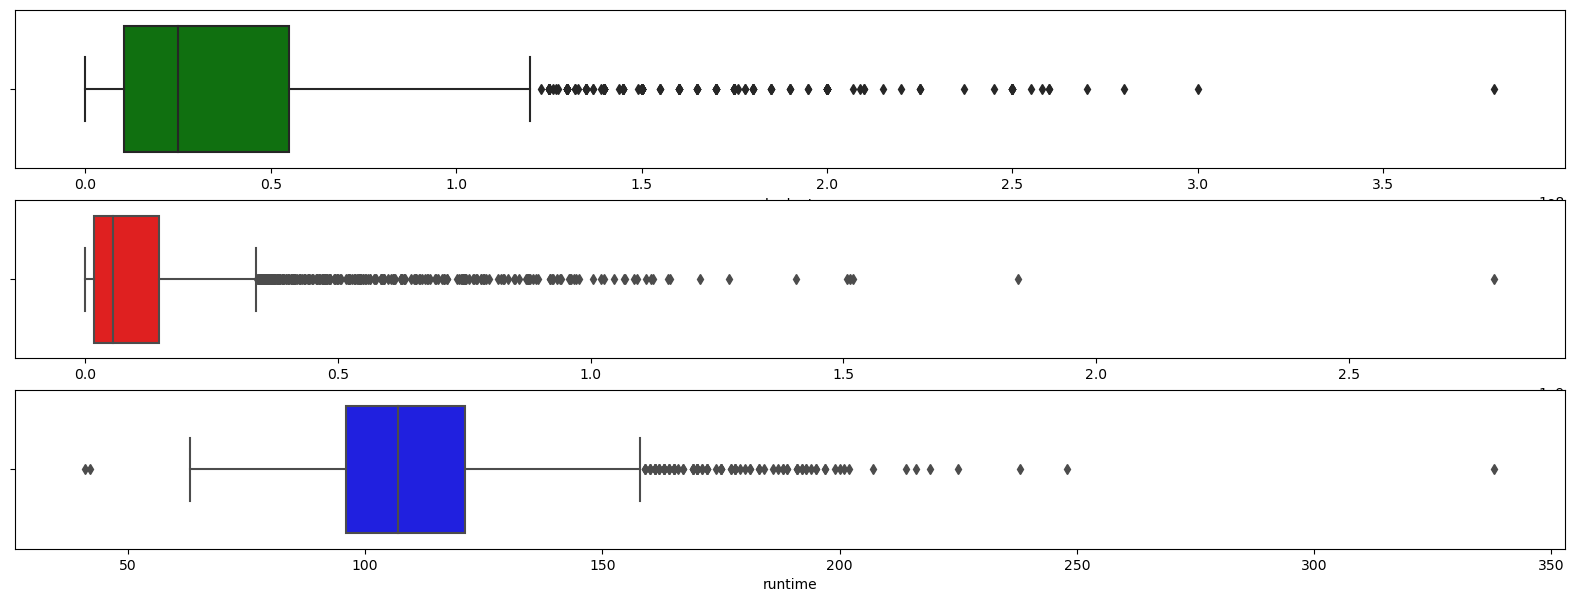

In [54]:
fig, ax = plt.subplots(3, 1, figsize= (20, 7))               
sb.boxplot(x = df_movie_new["budget"], ax = ax[0], color = "g") 
sb.boxplot(x = df_movie_new["revenue"], ax = ax[1], color = "r") 
sb.boxplot(x = df_movie_new["runtime"], ax = ax[2], color = "b") 
plt.show()

In [36]:
#OUTLIERS ARE OBSERVED IN ALL THREE CASES AND THEY MOSTLY ABOVE THE ABOVE THE UPPER FENCE.

# TASK-11

In [24]:
#Fetching average run time
df_runmean=(df_desc['runtime'].mean()) 
df_runmean

118.626

In [26]:
#Fetching movies with more than average run time
df_movie_new['title'][df_movie_new['runtime']>df_runmean]

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4677                                       Three
4686                                       Ordet
4720                       The Birth of a Nation
4782                                    Flywheel
4800                   Signed, Sealed, Delivered
Name: title, Length: 1133, dtype: object